## **Experiment 1: Baseline Models**

### **Apply Features for Modelling**

Specific columns were selected and will be used as features for building a machine learning models, ensuring that the model is trained on relevant and appropriately scaled data.

In [1]:
import pandas as pd

file_path = "C:/Users/HS/Downloads/FYP_Datasets/Scaled_Dataset.csv"
model_df = pd.read_csv(file_path)

# View summary statistics of 'Sales'
print("Summary Statistics:\n", model_df['Sales'].describe())

features = model_df[['Discount', 'Profit', 'Sales_rolling_mean', 'Sales_rolling_std',
       'Sales_ewma', 'Sales_lag_1', 'Sales_lag_2', 'Sales_lag_3',
       'order_quarterofyear_sin', 'order_quarterofyear_cos']]

Summary Statistics:
 count    6695.000000
mean      137.921241
std       134.833113
min         3.990000
25%        44.100000
50%        90.900000
75%       184.513500
max       727.500000
Name: Sales, dtype: float64


### **Training and Testing Data Split**

In [2]:
from sklearn.model_selection import train_test_split

X = features
y = model_df['Sales']

# Split data into training-testing sets (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **Random Forest**

In [3]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Define model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make prediction for test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate model
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_y_pred)

model_performance = pd.DataFrame({'Model': ['Random Forest'], 'MAE': [rf_mae], 'MSE': [rf_mse], 'RMSE': [rf_rmse], 'R² Score': [rf_r2]})

print(f"Random Forest Model Performance Evaluation:")
print(f"MAE: {rf_mae:.5f}")
print(f"MSE: {rf_mse:.8f}")
print(f"RMSE: {rf_rmse:.5f}")
print(f"R² Score: {rf_r2:.5f}")

Random Forest Model Performance Evaluation:
MAE: 10.67363
MSE: 214.44291582
RMSE: 14.64387
R² Score: 0.98801


**Random Forest Prediction and Performance Evaluation**

C:\Users\HS\AppData\Local\Temp\ipykernel_7368\4172115605.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_rf['RF Predicted Sales'] = rf_y_all_pred
C:\Users\HS\AppData\Local\Temp\ipykernel_7368\4172115605.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_rf['Order Date'] = pd.to_datetime(sales_rf['Order Date'])
C:\Users\HS\AppData\Local\Temp\ipykernel_7368\4172115605.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

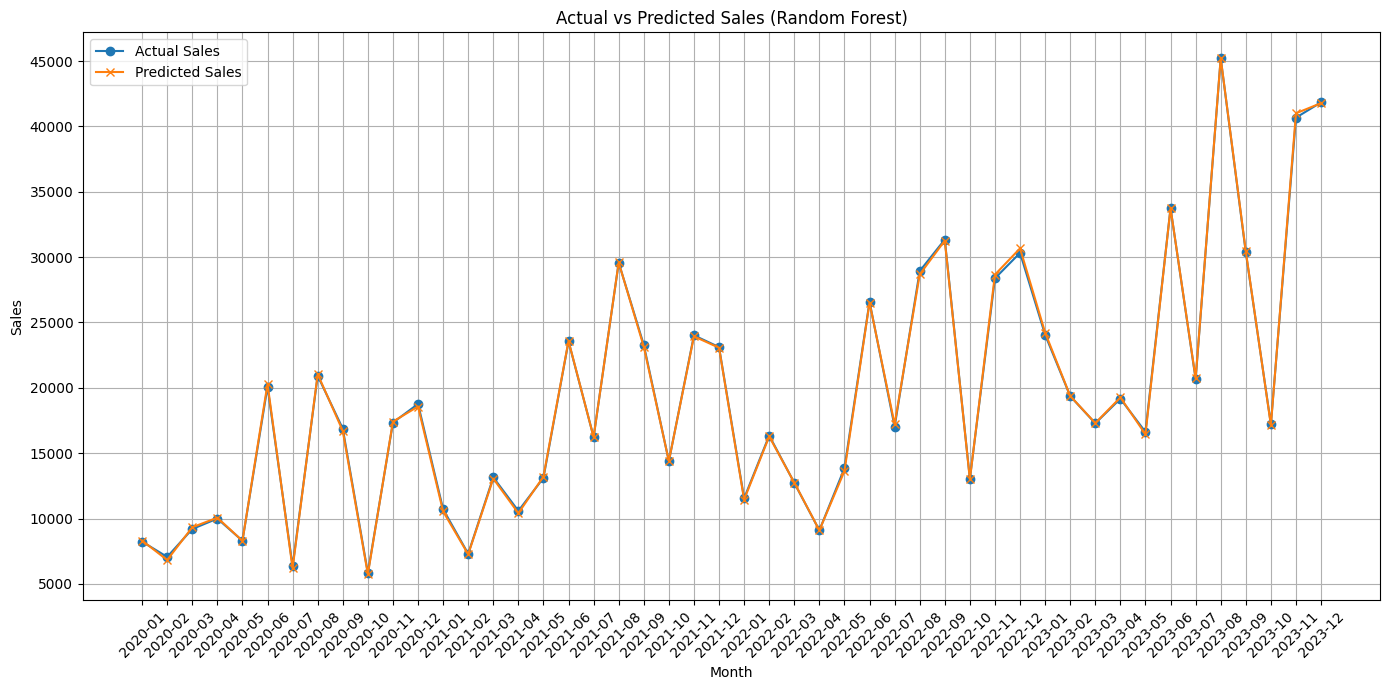

In [4]:
import matplotlib.pyplot as plt

# Make prediction for entire dataset
rf_y_all_pred = rf_model.predict(X)

sales_rf = model_df[['Order Date', 'Sales']]

sales_rf['RF Predicted Sales'] = rf_y_all_pred

# Convert 'Order Date' to datetime format
sales_rf['Order Date'] = pd.to_datetime(sales_rf['Order Date'])

exp_data = sales_rf['RF Predicted Sales']

# Aggregate sales by month and year
sales_rf['Month'] = sales_rf['Order Date'].dt.to_period('M')
mth_sales_rf = sales_rf.groupby('Month').agg({'Sales': 'sum', 'RF Predicted Sales': 'sum', }).reset_index()

# Plot actual vs predicted sales
plt.figure(figsize=(14, 7))
plt.plot(mth_sales_rf['Month'].astype(str), mth_sales_rf['Sales'], label='Actual Sales', marker='o')
plt.plot(mth_sales_rf['Month'].astype(str), mth_sales_rf['RF Predicted Sales'], label='Predicted Sales', marker='x')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- **Close Alignment:** The predicted sales (orange line) closely follow the actual sales (blue line), indicating that the Random Forest model is performing well in predicting sales.

- **Fluctuations:** Both lines show fluctuations in sales over time, with noticeable peaks and troughs. The sales figures generally increase over the period, with some significant spikes and drops.

- **Accuracy:** The close alignment between the actual and predicted sales suggests that the Random Forest model is accurately capturing the underlying patterns in the sales data.

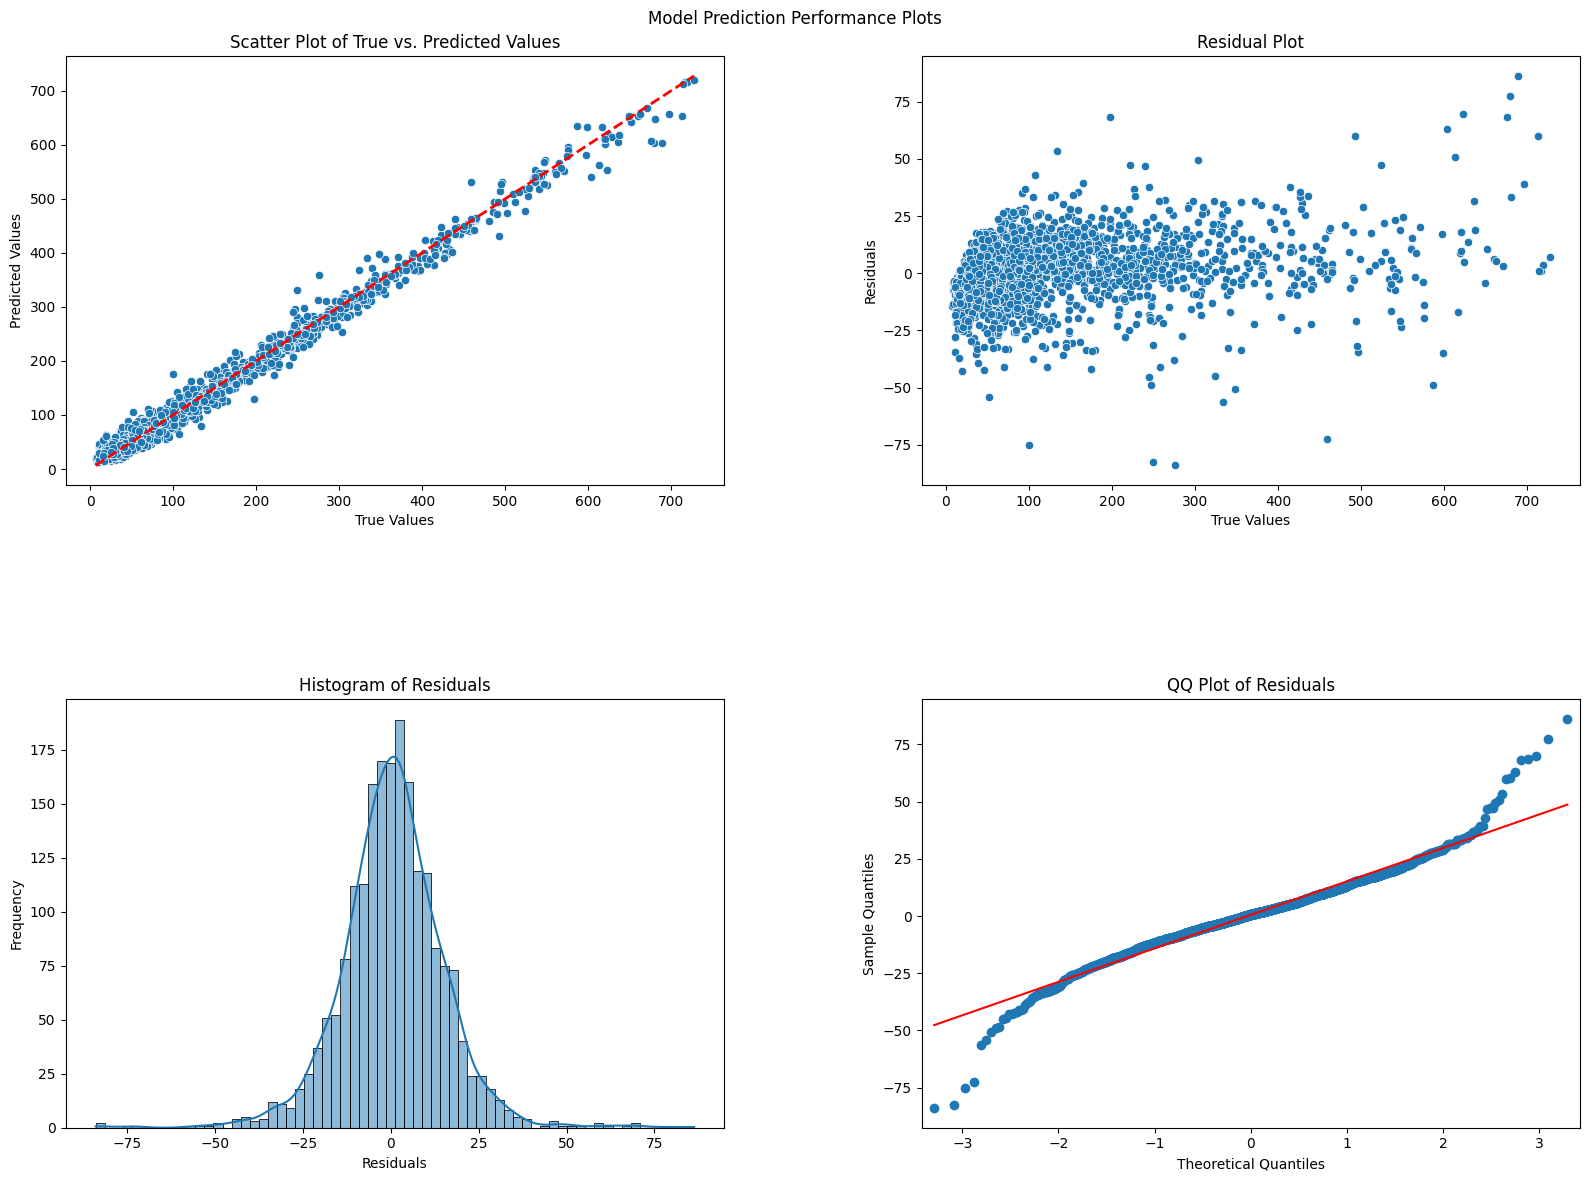

In [5]:
import seaborn as sns
import statsmodels.api as sm

# Calculate residuals
residuals = y_test - rf_y_pred

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Prediction Performance Plots')

# Scatter Plot of True vs. Predicted Values
sns.scatterplot(x=y_test, y=rf_y_pred, ax=axes[0, 0])
axes[0, 0].set_xlabel('True Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Scatter Plot of True vs. Predicted Values')
diag_line = np.arange(min(y_test), max(y_test), 0.1)
axes[0, 0].plot(diag_line, diag_line, color='red', linestyle='--', lw=2)

# Residual Plot
sns.scatterplot(x=y_test, y=residuals, ax=axes[0, 1])
axes[0, 1].set_xlabel('True Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')

# Histogram of Residuals
sns.histplot(residuals, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Residuals')

# QQ Plot of Residuals
sm.qqplot(residuals, line='s', ax=axes[1, 1])
axes[1, 1].set_title('QQ Plot of Residuals')

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

- **Scatter Plot of True vs. Predicted Values:**

Observation: The points are closely clustered around the red dashed line, which represents the ideal scenario where predicted values perfectly match true values (a 45-degree line). This indicates that the model's predictions are generally accurate, but there are some deviations, especially at higher values.

- **Residual Plot:** 

Observation: Ideally, the residuals should be randomly scattered around the horizontal axis (residual = 0) without any discernible pattern. However, there is a noticeable pattern where residuals tend to increase with higher true values, indicating potential heteroscedasticity or model bias.

- **Histogram of Residuals:** 

Observation: The histogram appears to be roughly bell-shaped, suggesting that the residuals are approximately normally distributed. However, there are some outliers on both ends, indicating that there are a few predictions with large errors.

- **QQ Plot of Residuals:** 

Observation: If the residuals are normally distributed, the points should lie along the red line. In this plot, the points deviate from the red line at both ends, indicating that the residuals have heavier tails than a normal distribution (i.e., there are more extreme values than expected under normality).

### **Extreme Gradient Boosting**

In [6]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Define model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Make prediction for test set
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate model
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_y_pred)

model_performance = pd.concat([model_performance, pd.DataFrame([{'Model': 'XGBoost', 'MAE': xgb_mae, 'MSE': xgb_mse, 'RMSE': xgb_rmse, 'R² Score': xgb_r2}])], ignore_index=True)

print(f"XGBoost Model Performance Evaluation:")
print(f"MAE: {xgb_mae:.5f}")
print(f"MSE: {xgb_mse:.8f}")
print(f"RMSE: {xgb_rmse:.5f}")
print(f"R² Score: {xgb_r2:.5f}")

XGBoost Model Performance Evaluation:
MAE: 9.95085
MSE: 207.05855551
RMSE: 14.38953
R² Score: 0.98843


**XGBoost Prediction and Performance Evaluation**

C:\Users\HS\AppData\Local\Temp\ipykernel_7368\1902917345.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_xgb['XGB Predicted Sales'] = xgb_y_all_pred
C:\Users\HS\AppData\Local\Temp\ipykernel_7368\1902917345.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_xgb['Order Date'] = pd.to_datetime(sales_xgb['Order Date'])
C:\Users\HS\AppData\Local\Temp\ipykernel_7368\1902917345.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

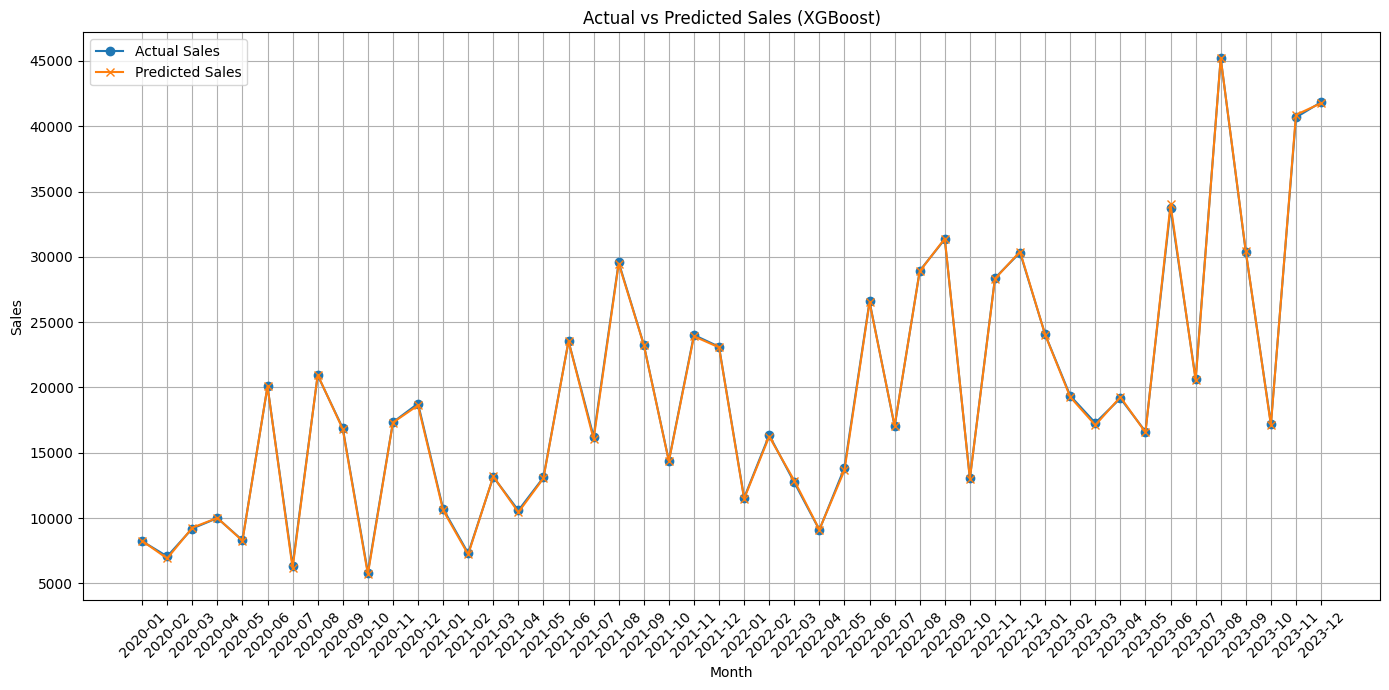

In [7]:
import matplotlib.pyplot as plt

# Make prediction for entire dataset
xgb_y_all_pred = xgb_model.predict(X)

sales_xgb = model_df[['Order Date', 'Sales']]

sales_xgb['XGB Predicted Sales'] = xgb_y_all_pred

# Convert 'Order Date' to datetime format
sales_xgb['Order Date'] = pd.to_datetime(sales_xgb['Order Date'])

exp_data = sales_xgb['XGB Predicted Sales']

# Aggregate sales by month and year
sales_xgb['Month'] = sales_xgb['Order Date'].dt.to_period('M')
mth_sales_xgb = sales_xgb.groupby('Month').agg({'Sales': 'sum', 'XGB Predicted Sales': 'sum', }).reset_index()

# Plot actual vs predicted sales
plt.figure(figsize=(14, 7))
plt.plot(mth_sales_xgb['Month'].astype(str), mth_sales_xgb['Sales'], label='Actual Sales', marker='o')
plt.plot(mth_sales_xgb['Month'].astype(str), mth_sales_xgb['XGB Predicted Sales'], label='Predicted Sales', marker='x')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (XGBoost)')
plt.legend()
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

- **Close Alignment:** The predicted sales (orange line) closely follow the actual sales (blue line), indicating that the XGBoost model performs well in predicting sales.

- **Similar Trends:** Both lines exhibit similar trends, with peaks and troughs occurring at the same points, suggesting that the model accurately captures the seasonal and trend components of the sales data.

- **Accuracy:** The closeness of the two lines suggests that the XGBoost model has a high level of accuracy in its predictions.

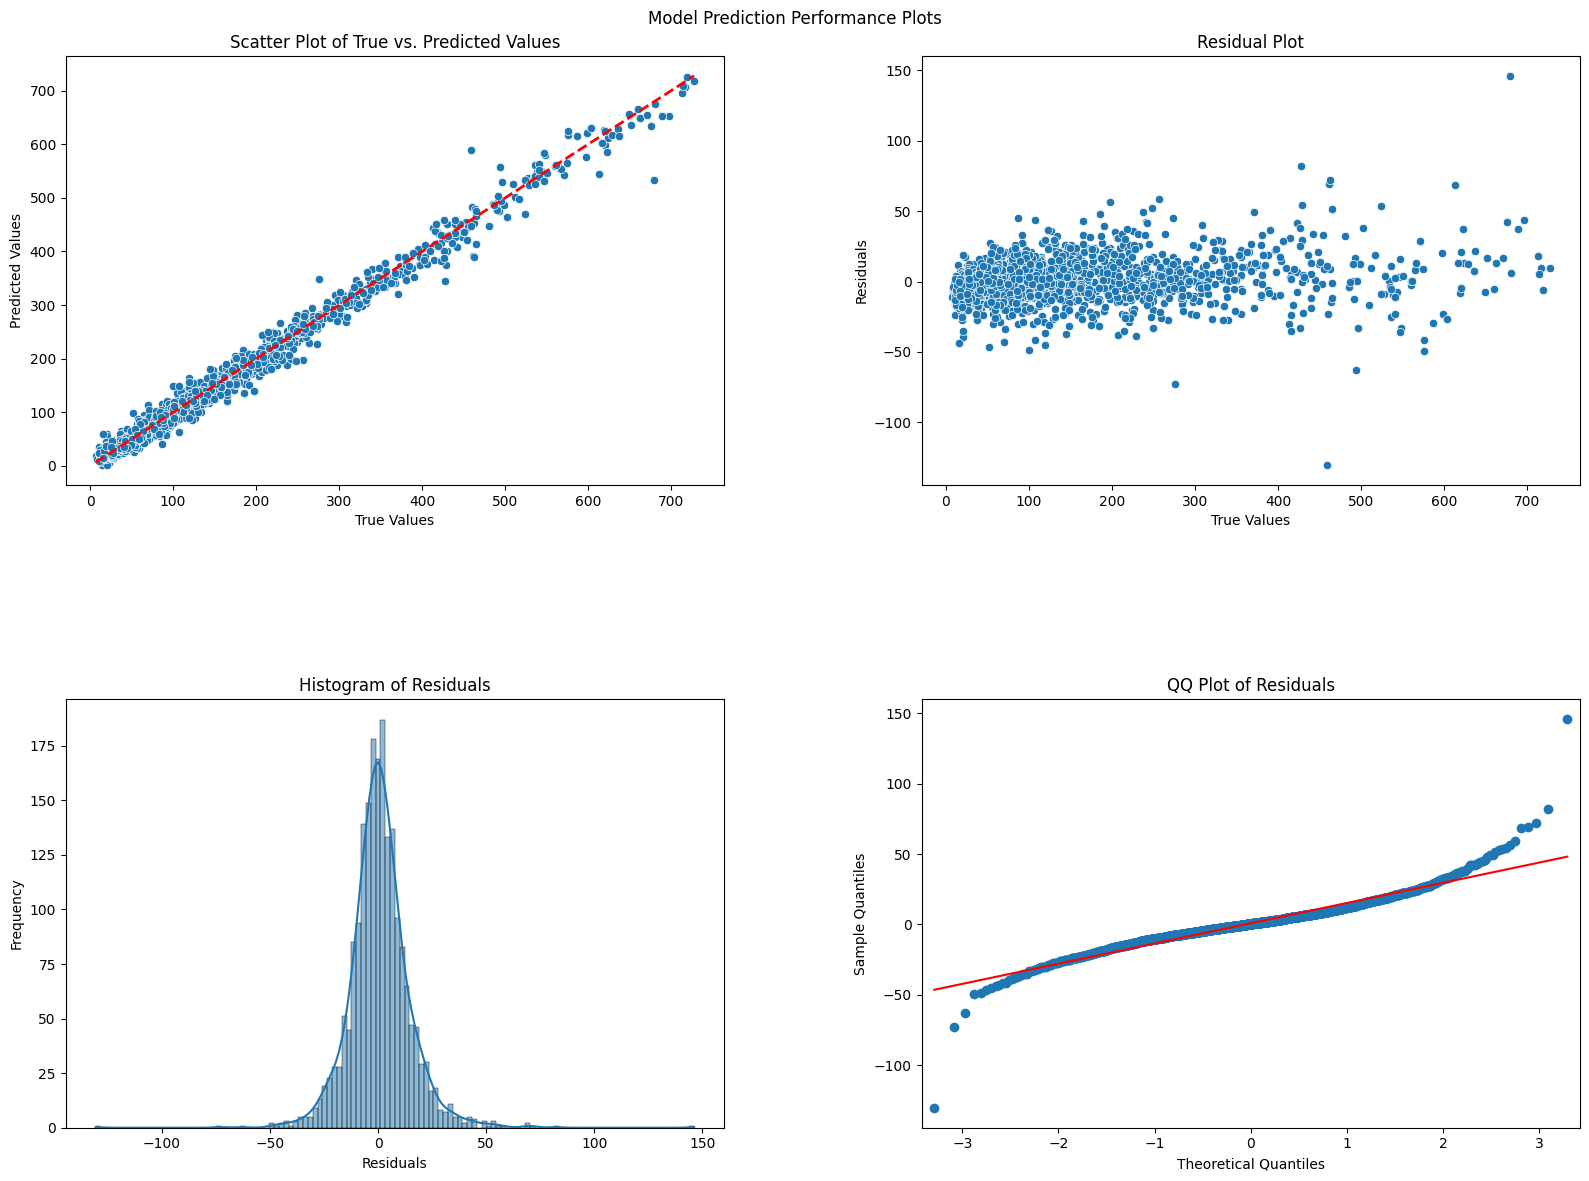

In [8]:

import seaborn as sns
import statsmodels.api as sm

# Calculate residuals
residuals = y_test - xgb_y_pred

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Prediction Performance Plots')

# Scatter Plot of True vs. Predicted Values
sns.scatterplot(x=y_test, y=xgb_y_pred, ax=axes[0, 0])
axes[0, 0].set_xlabel('True Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Scatter Plot of True vs. Predicted Values')
diag_line = np.arange(min(y_test), max(y_test), 0.1)
axes[0, 0].plot(diag_line, diag_line, color='red', linestyle='--', lw=2)

# Residual Plot
sns.scatterplot(x=y_test, y=residuals, ax=axes[0, 1])
axes[0, 1].set_xlabel('True Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')

# Histogram of Residuals
sns.histplot(residuals, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Residuals')

# QQ Plot of Residuals
sm.qqplot(residuals, line='s', ax=axes[1, 1])
axes[1, 1].set_title('QQ Plot of Residuals')

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

- **Scatter Plot of True vs. Predicted Values:**

Observation: The points are closely clustered around the red dashed line, which represents the ideal scenario where predicted values perfectly match true values (a 45-degree line). This indicates that the model's predictions are generally accurate, but there are some deviations, especially at higher values.

- **Residual Plot:**

Observation: Ideally, the residuals should be randomly scattered around the horizontal axis (residual = 0) without any discernible pattern. However, there is a noticeable pattern where residuals tend to increase with higher true values, indicating potential heteroscedasticity or model bias.

- **Histogram of Residuals:**

Observation: The histogram appears to be roughly bell-shaped, suggesting that the residuals are approximately normally distributed. However, there are some outliers on both ends, indicating that there are a few predictions with large errors.

- **QQ Plot of Residuals:**

Observation: If the residuals are normally distributed, the points should lie along the red line. In this plot, the points deviate from the red line at both ends, indicating that the residuals have heavier tails than a normal distribution (i.e., there are more extreme values than expected under normality).

### **SVM**

In [9]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR

# Define model
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Make prediction
svm_y_pred = svm_model.predict(X_test)

# Evaluate model
svm_mae = mean_absolute_error(y_test, svm_y_pred)
svm_mse = mean_squared_error(y_test, svm_y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_r2 = r2_score(y_test, svm_y_pred)

model_performance = pd.concat([model_performance, pd.DataFrame([{'Model': 'SVM', 'MAE': svm_mae, 'MSE': svm_mse, 'RMSE': svm_rmse, 'R² Score': svm_r2}])], ignore_index=True)

print(f"SVM Model Performance Evaluation:")
print(f"MAE: {svm_mae:.5f}")
print(f"MSE: {svm_mse:.8f}")
print(f"RMSE: {svm_rmse:.5f}")
print(f"R² Score: {svm_r2:.5f}")

SVM Model Performance Evaluation:
MAE: 90.77215
MSE: 19246.81322050
RMSE: 138.73288
R² Score: -0.07590


**SVM Prediction and Performance Evaluation**

C:\Users\HS\AppData\Local\Temp\ipykernel_7368\208772102.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_svm['SVM Predicted Sales'] = svm_y_all_pred
C:\Users\HS\AppData\Local\Temp\ipykernel_7368\208772102.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_svm['Order Date'] = pd.to_datetime(sales_svm['Order Date'])
C:\Users\HS\AppData\Local\Temp\ipykernel_7368\208772102.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

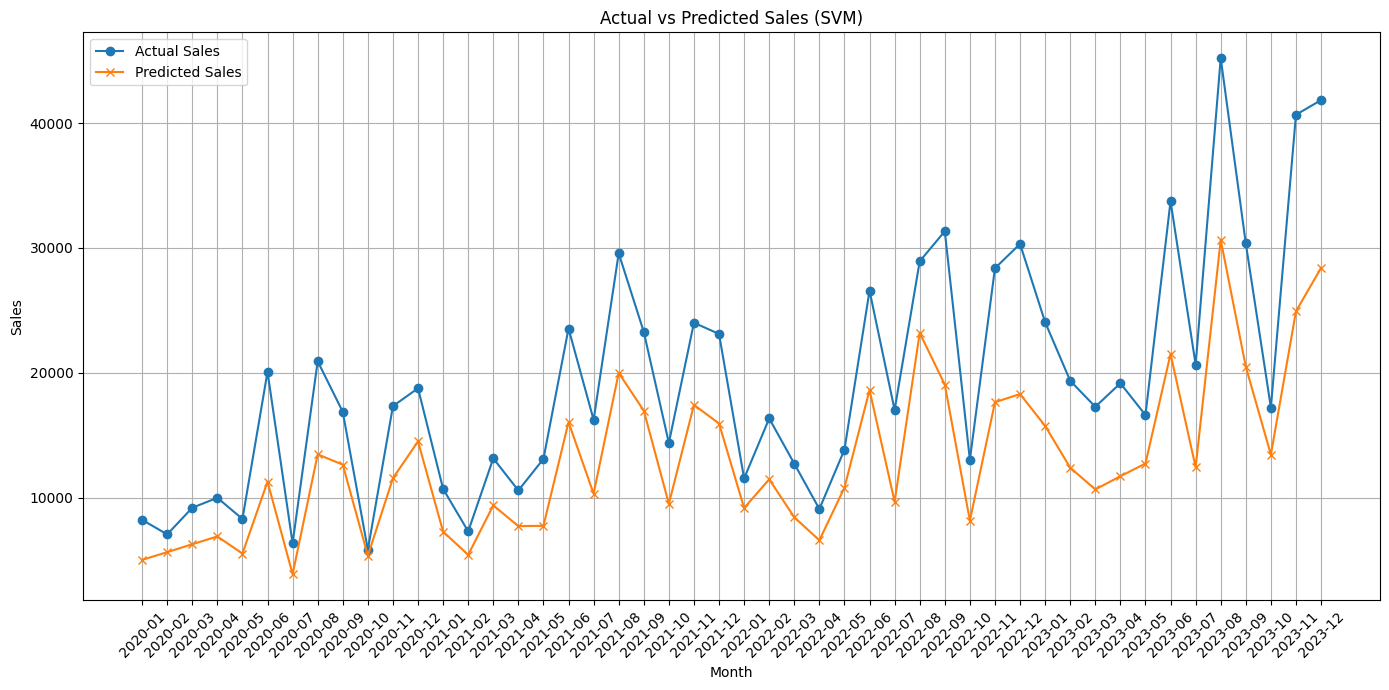

In [10]:
# Make prediction for entire dataset
svm_y_all_pred = svm_model.predict(X)

sales_svm = model_df[['Order Date', 'Sales']]

sales_svm['SVM Predicted Sales'] = svm_y_all_pred

# Convert 'Order Date' to datetime format
sales_svm['Order Date'] = pd.to_datetime(sales_svm['Order Date'])

exp_data = sales_svm['SVM Predicted Sales']

# Aggregate sales by month and year
sales_svm['Month'] = sales_svm['Order Date'].dt.to_period('M')
mth_sales_svm = sales_svm.groupby('Month').agg({'Sales': 'sum', 'SVM Predicted Sales': 'sum', }).reset_index()

import matplotlib.pyplot as plt

# Plot actual vs predicted sales
plt.figure(figsize=(14, 7))
plt.plot(mth_sales_svm['Month'].astype(str), mth_sales_svm['Sales'], label='Actual Sales', marker='o')
plt.plot(mth_sales_svm['Month'].astype(str), mth_sales_svm['SVM Predicted Sales'], label='Predicted Sales', marker='x')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (SVM)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- **Alignment:** While the predicted sales (orange line) follow the general trend of the actual sales (blue line), there are notable discrepancies. The SVM model does not capture the peaks and troughs of the actual sales data accurately, and predicted values are generally lower than the actual values.

- **Trend Similarities:** Both lines exhibit similar overall trends with increasing sales over time, indicating that the SVM model captures the broad seasonal patterns but struggles with the finer details.

- **Model Performance:** The discrepancy between the actual and predicted sales suggests that the SVM model may need improvement to better capture the variability in the actual sales data.

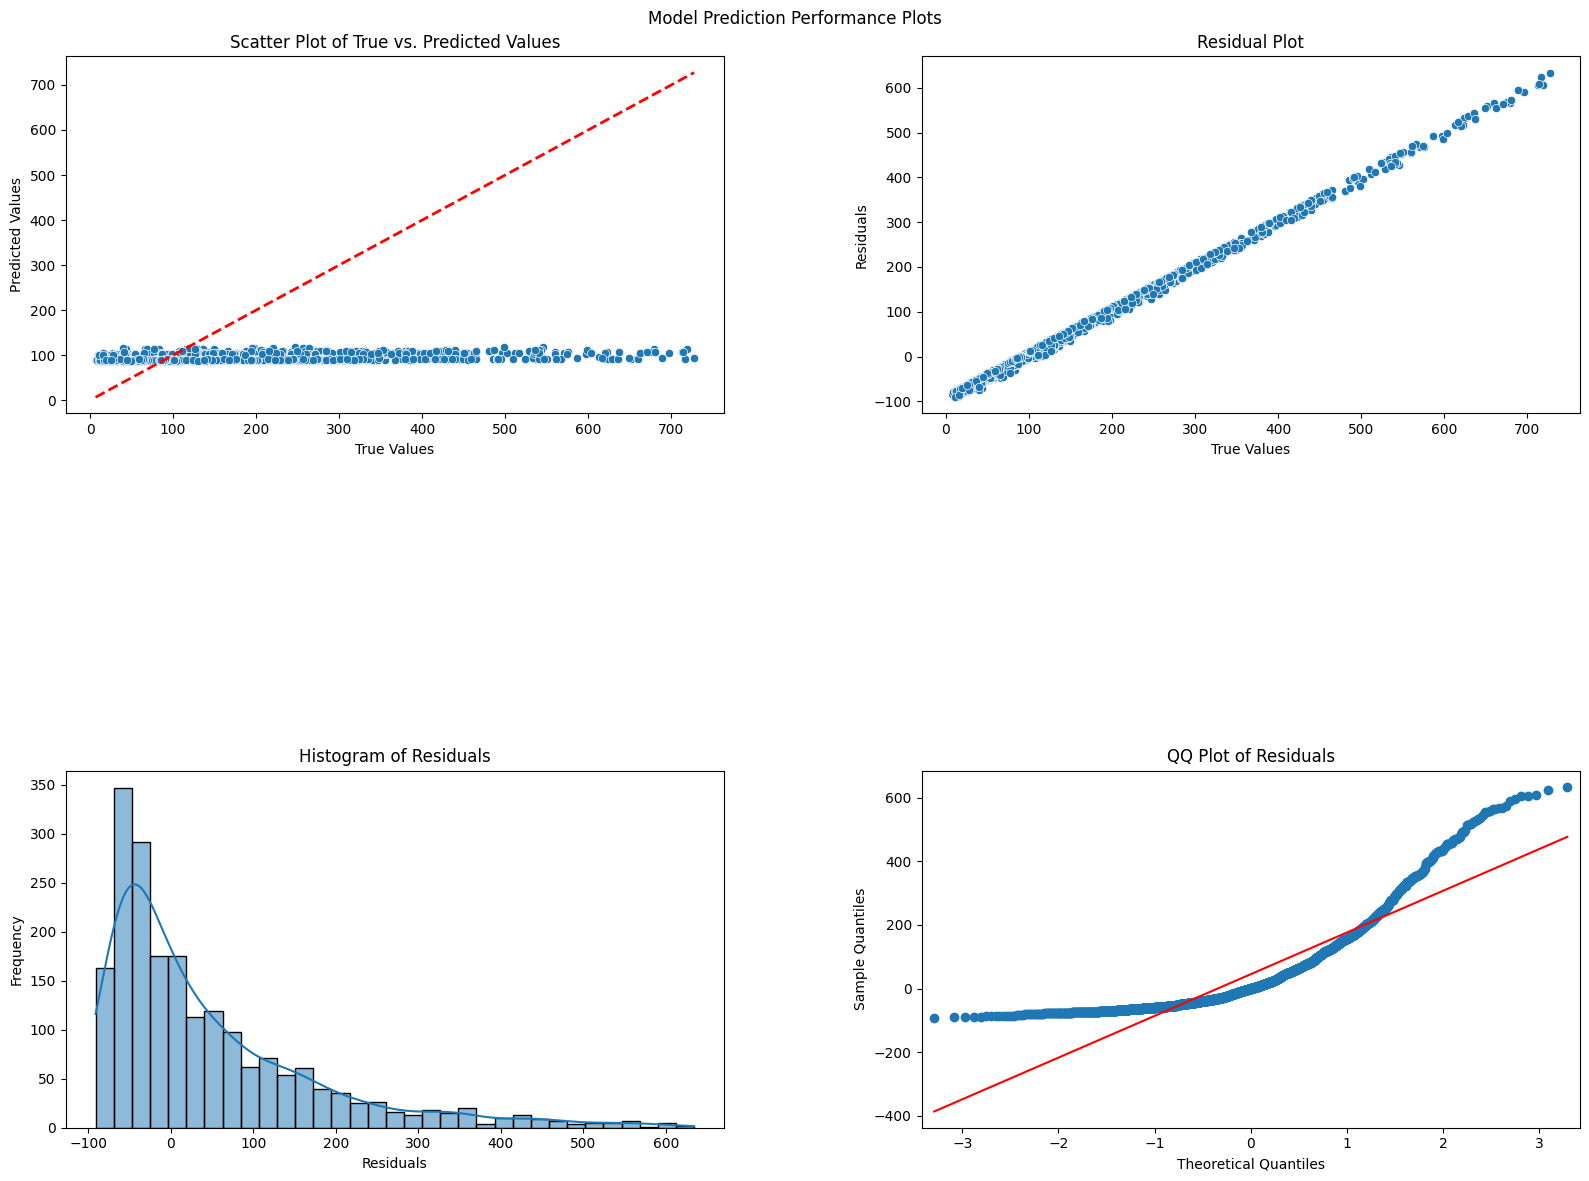

In [11]:

import seaborn as sns
import statsmodels.api as sm

# Calculate residuals
residuals = y_test - svm_y_pred

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Prediction Performance Plots')

# Scatter Plot of True vs. Predicted Values
sns.scatterplot(x=y_test, y=svm_y_pred, ax=axes[0, 0])
axes[0, 0].set_xlabel('True Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Scatter Plot of True vs. Predicted Values')
diag_line = np.arange(min(y_test), max(y_test), 0.1)
axes[0, 0].plot(diag_line, diag_line, color='red', linestyle='--', lw=2)

# Residual Plot
sns.scatterplot(x=y_test, y=residuals, ax=axes[0, 1])
axes[0, 1].set_xlabel('True Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')

# Histogram of Residuals
sns.histplot(residuals, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Residuals')

# QQ Plot of Residuals
sm.qqplot(residuals, line='s', ax=axes[1, 1])
axes[1, 1].set_title('QQ Plot of Residuals')

plt.tight_layout()
plt.subplots_adjust(hspace=1.0, wspace=0.3)
plt.show()

- **Scatter Plot of True vs. Predicted Values:**

Observation: The points are scattered below the red line, indicating that the model consistently underestimates the true values. The clustering below the line suggests systematic bias in the model's predictions.

- **Residual Plot:**

Observation: The residuals increase linearly with the true values, suggesting that the model's errors grow as the true values increase. This indicates potential issues with the model, such as heteroscedasticity, where the variance of errors increases with the magnitude of the true values.

- **Histogram of Residuals:**

Observation: The residuals are skewed to the right, with a peak around -100 and a long tail extending to the right. This skewness indicates that the model tends to underestimate the true values more frequently than it overestimates them, contributing to the systematic bias observed in the scatter plot.

- **QQ Plot of Residuals:**

Observation: The points deviate significantly from the red line, especially in the tails, indicating that the residuals do not follow a normal distribution. This suggests that the model's errors are not normally distributed, which may affect the validity of certain statistical tests and confidence intervals.

### **Artificial Neural Network**

In [12]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

# Define model
ann_model = MLPRegressor(random_state=42)
ann_model.fit(X_train, y_train)

# Make prediction
ann_y_pred = ann_model.predict(X_test)

# Evaluate model
ann_mae = mean_absolute_error(y_test, ann_y_pred)
ann_mse = mean_squared_error(y_test, ann_y_pred)
ann_rmse = np.sqrt(ann_mse)
ann_r2 = r2_score(y_test, ann_y_pred)

model_performance = pd.concat([model_performance, pd.DataFrame([{'Model': 'ANN', 'MAE': ann_mae, 'MSE': ann_mse, 'RMSE': ann_rmse, 'R² Score': ann_r2}])], ignore_index=True)

print(f"ANN Model Performance Evaluation:")
print(f"MAE: {ann_mae:.5f}")
print(f"MSE: {ann_mse:.8f}")
print(f"RMSE: {ann_rmse:.5f}")
print(f"R² Score: {ann_r2:.5f}")

ANN Model Performance Evaluation:
MAE: 89.78333
MSE: 14475.77099787
RMSE: 120.31530
R² Score: 0.19080


c:\Users\HS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Artificial Neural Network Prediction and Performance Evaluation**

C:\Users\HS\AppData\Local\Temp\ipykernel_7368\2732977142.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_ann['ANN Predicted Sales'] = ann_y_all_pred
C:\Users\HS\AppData\Local\Temp\ipykernel_7368\2732977142.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_ann['Order Date'] = pd.to_datetime(sales_ann['Order Date'])
C:\Users\HS\AppData\Local\Temp\ipykernel_7368\2732977142.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

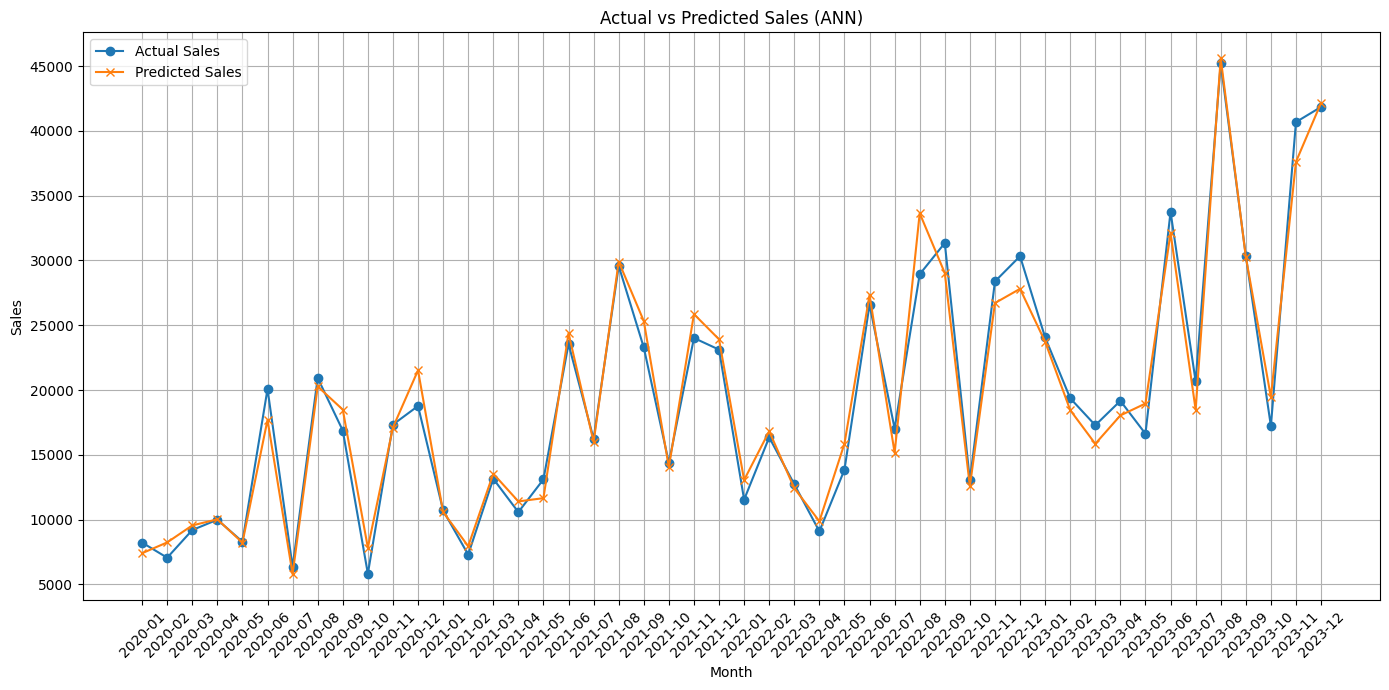

In [13]:
import matplotlib.pyplot as plt

# Make prediction for entire dataset
ann_y_all_pred = ann_model.predict(X)

sales_ann = model_df[['Order Date', 'Sales']]

sales_ann['ANN Predicted Sales'] = ann_y_all_pred

# Convert 'Order Date' to datetime format
sales_ann['Order Date'] = pd.to_datetime(sales_ann['Order Date'])

exp_data = sales_ann['ANN Predicted Sales']

# Aggregate sales by month and year
sales_ann['Month'] = sales_ann['Order Date'].dt.to_period('M')
mth_sales_ann = sales_ann.groupby('Month').agg({'Sales': 'sum', 'ANN Predicted Sales': 'sum', }).reset_index()

# Plot actual vs predicted sales
plt.figure(figsize=(14, 7))
plt.plot(mth_sales_ann['Month'].astype(str), mth_sales_ann['Sales'], label='Actual Sales', marker='o')
plt.plot(mth_sales_ann['Month'].astype(str), mth_sales_ann['ANN Predicted Sales'], label='Predicted Sales', marker='x')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (ANN)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- **Close Alignment:** The predicted sales (orange line) closely follow the trend of the actual sales (blue line), indicating that the ANN model performs well in predicting sales.

- **Trend Similarities:** Both lines exhibit similar trends with peaks and troughs occurring at the same points, suggesting that the ANN model accurately captures the seasonal and trend components of the sales data.

- **Accuracy:** The close alignment between the actual and predicted sales suggests that the ANN model has a high level of accuracy in its predictions, though there might be slight deviations at certain points.

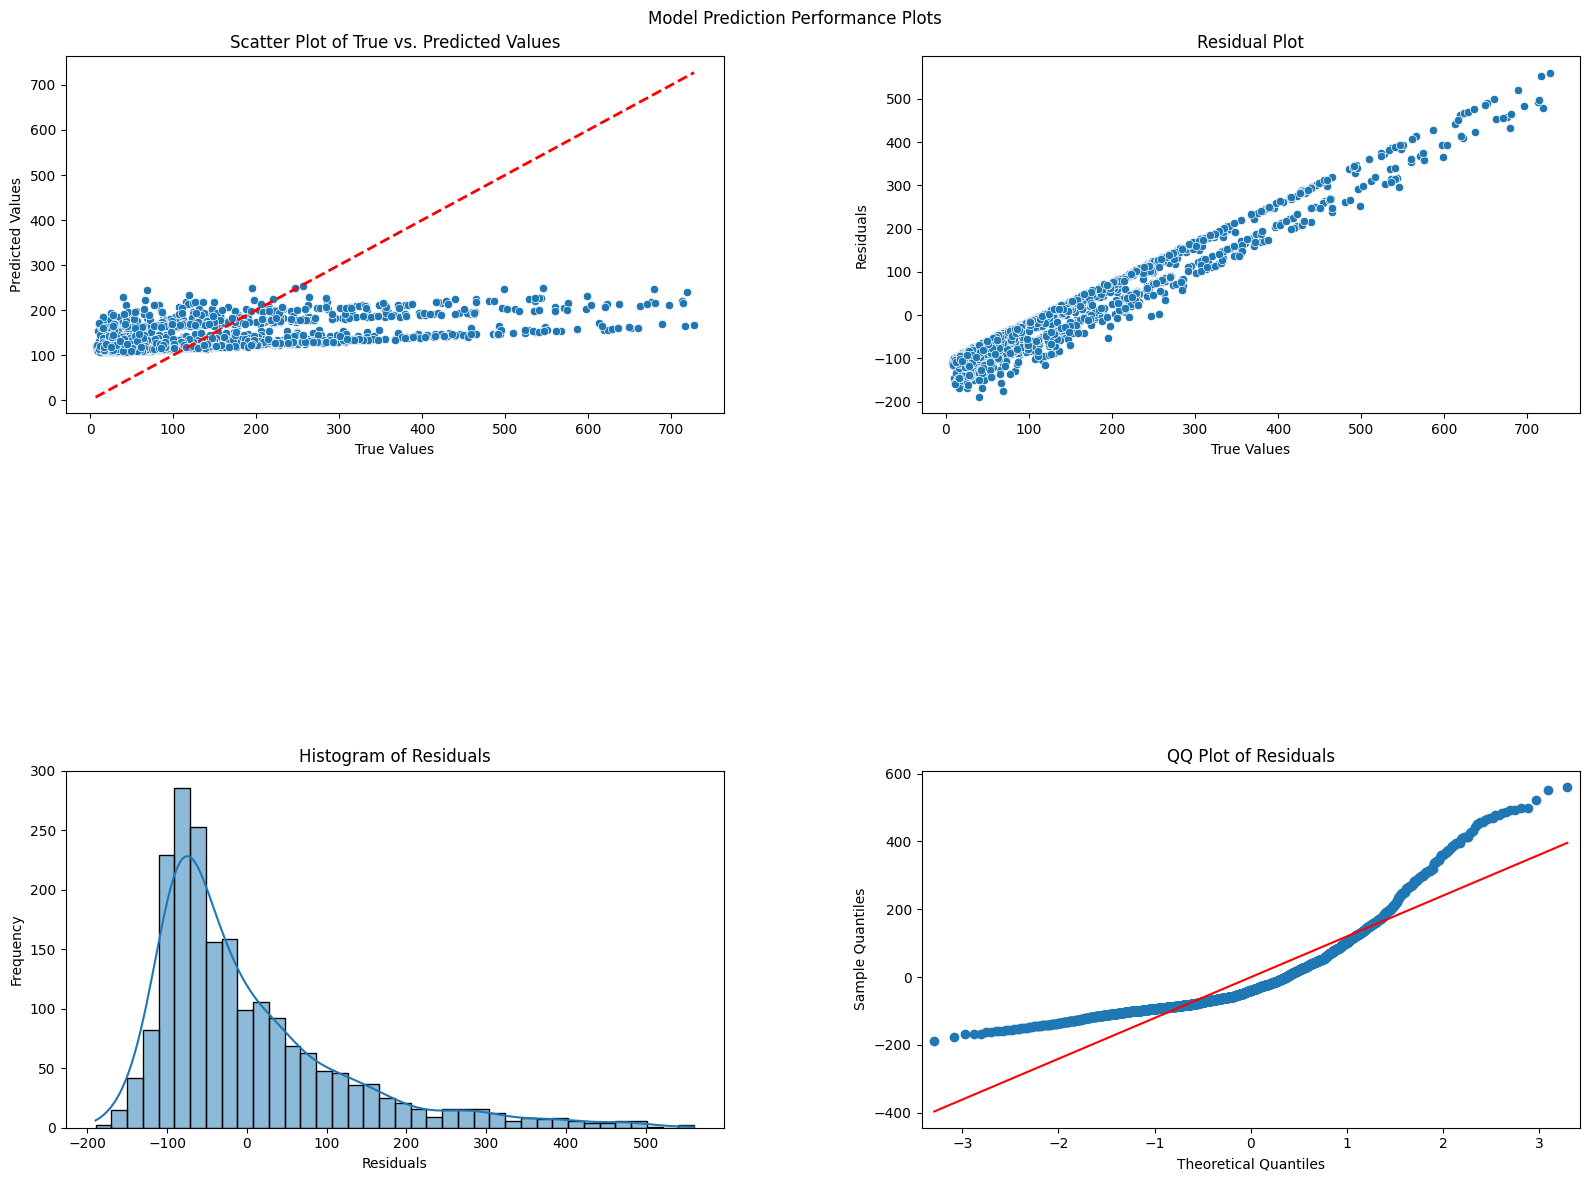

In [14]:

import seaborn as sns
import statsmodels.api as sm

# Calculate residuals
residuals = y_test - ann_y_pred

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Prediction Performance Plots')

# Scatter Plot of True vs. Predicted Values
sns.scatterplot(x=y_test, y=ann_y_pred, ax=axes[0, 0])
axes[0, 0].set_xlabel('True Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Scatter Plot of True vs. Predicted Values')
diag_line = np.arange(min(y_test), max(y_test), 0.1)
axes[0, 0].plot(diag_line, diag_line, color='red', linestyle='--', lw=2)

# Residual Plot
sns.scatterplot(x=y_test, y=residuals, ax=axes[0, 1])
axes[0, 1].set_xlabel('True Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')

# Histogram of Residuals
sns.histplot(residuals, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Residuals')

# QQ Plot of Residuals
sm.qqplot(residuals, line='s', ax=axes[1, 1])
axes[1, 1].set_title('QQ Plot of Residuals')

plt.tight_layout()
plt.subplots_adjust(hspace=1.0, wspace=0.3)
plt.show()

- **Scatter Plot of True vs. Predicted Values:**

Observation: The points are mostly below the red line, indicating that the model consistently underestimates the true values. The clustering below the line suggests systematic bias in the model's predictions.

- **Residual Plot:**

Observation: The residuals increase with the true values, suggesting that the model's errors grow as the true values increase. This indicates potential issues with the model, such as heteroscedasticity, where the variance of errors increases with the magnitude of the true values.

- **Histogram of Residuals:**

Observation: The residuals are skewed to the right, with a peak around -100 and a long tail extending to the right. This skewness indicates that the model tends to underestimate the true values more frequently than it overestimates them, contributing to the systematic bias observed in the scatter plot.

- **QQ Plot of Residuals:**

Observation: The points deviate significantly from the red line, especially in the tails, indicating that the residuals are not normally distributed. This suggests that the model's errors are not normally distributed, which may affect the validity of certain statistical tests and confidence intervals.

### **Long Short-Term Memory**

In [15]:
from sklearn.model_selection import train_test_split

X = features.values
y = model_df['Sales'].values

# Reshape data into 3D input: samples, timestep = 1, features
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split the data into training and testing sets (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dropout(0))
lstm_model.add(Dense(1))
lstm_optimizer = Adam(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_optimizer, loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = lstm_model.fit(
    X_train, y_train, epochs=10, batch_size=32, 
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping], verbose=2)

# Make prediction for test set
lstm_y_pred = lstm_model.predict(X_test)

# Reshape predictions to original
lstm_y_pred = lstm_y_pred.reshape(-1)
y_test = y_test.reshape(-1)

# Evaluate model
lstm_mae = mean_absolute_error(y_test, lstm_y_pred)
lstm_mse = mean_squared_error(y_test, lstm_y_pred)
lstm_rmse = np.sqrt(lstm_mse)
lstm_r2 = r2_score(y_test, lstm_y_pred)

model_performance = pd.concat([model_performance, pd.DataFrame([{'Model': 'LSTM', 'MAE': lstm_mae, 'MSE': lstm_mse, 'RMSE': lstm_rmse, 'R² Score': lstm_r2}])], ignore_index=True)

print(f"LSTM Model Performance Evaluation:")
print(f"MAE: {lstm_mae:.5f}")
print(f"MSE: {lstm_mse:.8f}")
print(f"RMSE: {lstm_rmse:.5f}")
print(f"R² Score: {lstm_r2:.5f}")

c:\Users\HS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
147/147 - 5s - 37ms/step - loss: 36978.1133 - val_loss: 36163.7266
Epoch 2/10
147/147 - 1s - 5ms/step - loss: 35335.8789 - val_loss: 33765.3477
Epoch 3/10
147/147 - 1s - 5ms/step - loss: 32718.4336 - val_loss: 31172.0371
Epoch 4/10
147/147 - 2s - 10ms/step - loss: 30378.7598 - val_loss: 29084.5840
Epoch 5/10
147/147 - 1s - 4ms/step - loss: 28522.5566 - val_loss: 27412.9922
Epoch 6/10
147/147 - 1s - 5ms/step - loss: 27023.6406 - val_loss: 26051.3164
Epoch 7/10
147/147 - 1s - 6ms/step - loss: 25781.6699 - val_loss: 24904.6309
Epoch 8/10
147/147 - 1s - 6ms/step - loss: 24724.3848 - val_loss: 23920.5781
Epoch 9/10
147/147 - 1s - 5ms/step - loss: 23821.1641 - val_loss: 23076.3242
Epoch 10/10
147/147 - 1s - 7ms/step - loss: 23040.4082 - val_loss: 22346.3613
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
LSTM Model Performance Evaluation:
MAE: 94.56098
MSE: 22346.36081660
RMSE: 149.48699
R² Score: -0.24917


**LSTM Prediction and Performance Evaluation**

210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\HS\AppData\Local\Temp\ipykernel_7368\1842274162.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_lstm['LSTM Predicted Sales'] = lstm_y_all_pred
C:\Users\HS\AppData\Local\Temp\ipykernel_7368\1842274162.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_lstm['Order Date'] = pd.to_datetime(sales_lstm['Order Date'])
C:\Users\HS\AppData\Local\Temp\ipykernel_7368\1842274162.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

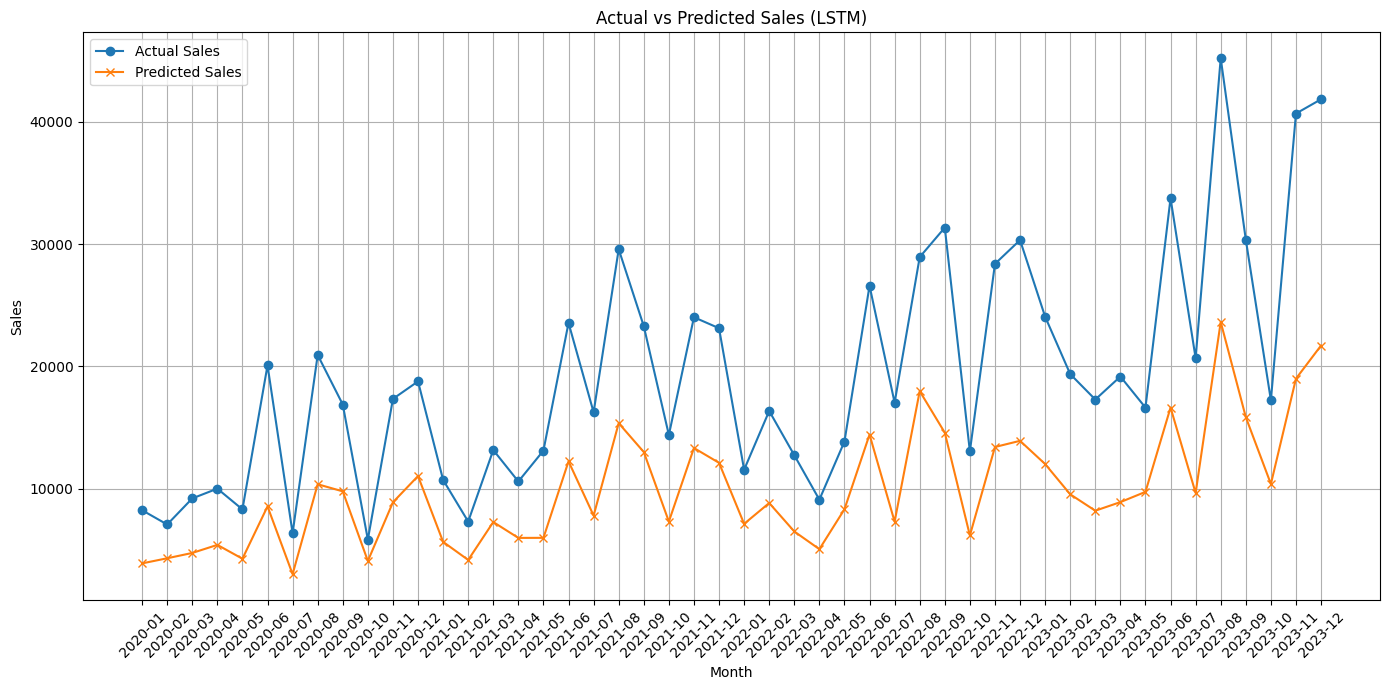

In [17]:
import matplotlib.pyplot as plt

# Make prediction for entire dataset
lstm_y_all_pred = lstm_model.predict(X)

sales_lstm = model_df[['Order Date', 'Sales']]

sales_lstm['LSTM Predicted Sales'] = lstm_y_all_pred

# Convert 'Order Date' to datetime format
sales_lstm['Order Date'] = pd.to_datetime(sales_lstm['Order Date'])

exp_data = sales_lstm['LSTM Predicted Sales']

# Aggregate sales by month and year
sales_lstm['Month'] = sales_lstm['Order Date'].dt.to_period('M')
mth_sales_lstm = sales_lstm.groupby('Month').agg({'Sales': 'sum', 'LSTM Predicted Sales': 'sum', }).reset_index()

# Plot actual vs predicted sales
plt.figure(figsize=(14, 7))
plt.plot(mth_sales_lstm['Month'].astype(str), mth_sales_lstm['Sales'], label='Actual Sales', marker='o')
plt.plot(mth_sales_lstm['Month'].astype(str), mth_sales_lstm['LSTM Predicted Sales'], label='Predicted Sales', marker='x')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (LSTM)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- **General Trend:** Both the actual sales (blue line) and predicted sales (orange line) show similar overall trends with fluctuations indicating seasonality and variability in sales over time.

- **Peaks and Troughs:** The actual sales exhibit significant peaks and troughs, highlighting variability. The predicted sales, however, generally remain lower than the actual sales and do not capture the peaks as accurately. There are noticeable differences where the predicted sales fail to match the high points of actual sales.

- **Alignment:** While the predicted sales follow the general trend of the actual sales, the discrepancies suggest that the LSTM model may struggle with accurately predicting extreme values or sudden changes.

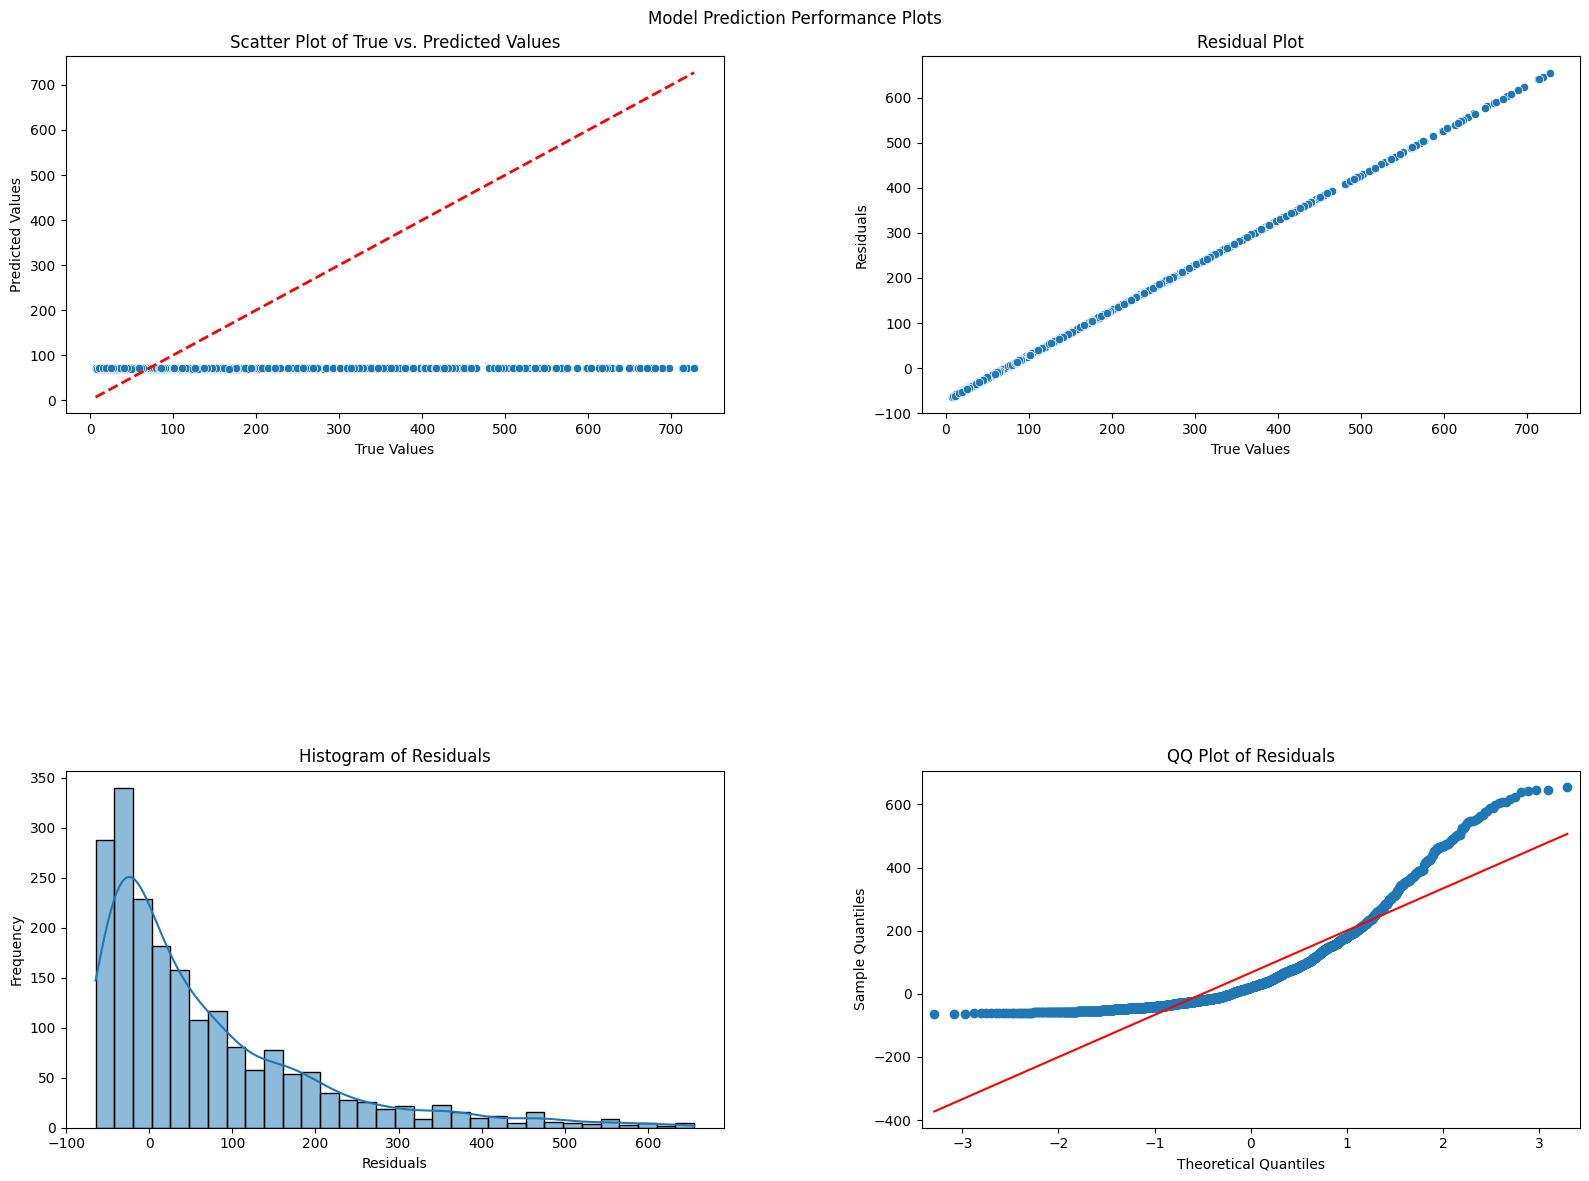

In [18]:
import seaborn as sns
import statsmodels.api as sm

# Calculate residuals
residuals = y_test - lstm_y_pred

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Prediction Performance Plots')

# Scatter Plot of True vs. Predicted Values
sns.scatterplot(x=y_test, y=lstm_y_pred, ax=axes[0, 0])
axes[0, 0].set_xlabel('True Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Scatter Plot of True vs. Predicted Values')
diag_line = np.arange(min(y_test), max(y_test), 0.1)
axes[0, 0].plot(diag_line, diag_line, color='red', linestyle='--', lw=2)

# Residual Plot
sns.scatterplot(x=y_test, y=residuals, ax=axes[0, 1])
axes[0, 1].set_xlabel('True Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')

# Histogram of Residuals
sns.histplot(residuals, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Residuals')

# QQ Plot of Residuals
sm.qqplot(residuals, line='s', ax=axes[1, 1])
axes[1, 1].set_title('QQ Plot of Residuals')

# Adjust the layout and display the subplots
plt.tight_layout()
plt.subplots_adjust(hspace=1.0, wspace=0.3)
plt.show()

- **Scatter Plot of True vs. Predicted Values:**

Observation: The scatter points indicate that the model's predictions are significantly lower than the true values, as most points lie far below the red dashed line. This suggests a consistent underestimation by the model.

- **Residual Plot:**

Observation: The residuals appear to increase linearly with the true values, indicating that the model consistently underestimates the true values by a large margin. This suggests potential issues with the model, such as heteroscedasticity, where the variance of errors increases with the magnitude of the true values.

- **Histogram of Residuals:**

Observation: The histogram is right-skewed, with a large number of residuals clustered around zero and a long tail extending to the right. This indicates that while many predictions are close to the true values, there are significant positive residuals where the model underestimates the true values.

- **QQ Plot of Residuals:**

Observation: The points deviate significantly from the red line, especially in the tails, indicating that the residuals are not normally distributed. This suggests that the model's errors are not normally distributed, which may affect the validity of certain statistical tests and confidence intervals.

### **Export Results**

In [19]:
# Combine all predicted sales columns
pred_sales = model_df[['Order Date', 'Sales']].copy()
pred_sales['RF Predicted Sales'] = rf_y_all_pred
pred_sales['XGB Predicted Sales'] = xgb_y_all_pred
pred_sales['SVM Predicted Sales'] = svm_y_all_pred
pred_sales['ANN Predicted Sales'] = ann_y_all_pred
pred_sales['LSTM Predicted Sales'] = lstm_y_all_pred

# Convert 'Order Date' to datetime format
pred_sales['Order Date'] = pd.to_datetime(pred_sales['Order Date'])

# Aggregate sales by month and year
pred_sales['Month'] = pred_sales['Order Date'].dt.to_period('M')
agg_sales = pred_sales.groupby('Month').agg({'Sales': 'sum', 'RF Predicted Sales': 'sum', 'XGB Predicted Sales': 'sum', 'SVM Predicted Sales': 'sum', 'ANN Predicted Sales': 'sum', 'LSTM Predicted Sales': 'sum'}).reset_index()

pred_sales.to_csv("C:/Users/HS/Downloads/FYP_Datasets/Baseline_Prediction_Monthly_Sales.csv", index=False)
agg_sales.to_csv("C:/Users/HS/Downloads/FYP_Datasets/Baseline_Prediction_Aggregated_Monthly_Sales.csv", index=False)
model_performance.to_csv("C:/Users/HS/Downloads/FYP_Datasets/Baseline_Performance.csv", index=False)
print(f"Datasets have been exported")

Datasets have been exported


In [20]:
# Rank the models
model_performance['Rank'] = model_performance[['MAE', 'MSE', 'RMSE', 'R² Score']].rank(ascending=[True, True, True, False]).mean(axis=1)
model_performance = model_performance.sort_values(by='Rank').reset_index(drop=True)
print(model_performance)

           Model        MAE           MSE        RMSE  R² Score  Rank
0        XGBoost   9.950845    207.058556   14.389529  0.988425   2.0
1  Random Forest  10.673634    214.442916   14.643870  0.988013   2.5
2            ANN  89.783332  14475.770998  120.315298  0.190800   3.0
3            SVM  90.772149  19246.813221  138.732884 -0.075903   3.5
4           LSTM  94.560977  22346.360817  149.486992 -0.249168   4.0
